In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Read an visualization the data

In [2]:
#read excel file and store data in dataframe
data = pd.read_excel("data.xls")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
x_train = data['X']
y_train = data['Y']

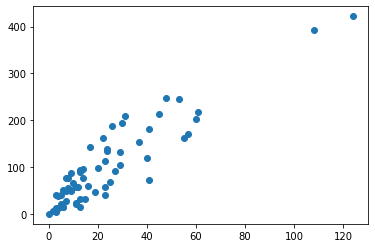

In [4]:
plt.scatter(x_train, y_train)
plt.show()

## train the model and find the global minimum parameters

In [5]:
#initilizing variblesparametersparameters
theta0_old, theta0_new, theta1_old, theta1_new, no_of_itteration = 0, 0 , 0, 0, 0
n = float(len(x_train))
alpha = 0.00001

In [6]:
#Loop that used to estimate the parameters depending on alpha coefficient 
while(True):
    y_pred = theta0_new + theta1_new * x_train
    theta0_old = theta0_new
    theta0_new = theta0_new - alpha * (1/n) * sum(y_pred - y_train)
    theta1_old = theta1_new
    theta1_new = theta1_new - alpha * (1/n) * sum(x_train * (y_pred - y_train))
    no_of_itteration = no_of_itteration + 1
    if(theta0_new - theta0_old <= 0.0001 and theta1_new - theta1_old <= 0.0001):
        break
print("theta0 = " + str(theta0_new), "theta1 = " + str(theta1_new), "Number of itteration = " + str(no_of_itteration))

theta0 = 0.20979833217481175 theta1 = 3.8410165694587928 Number of itteration = 1264


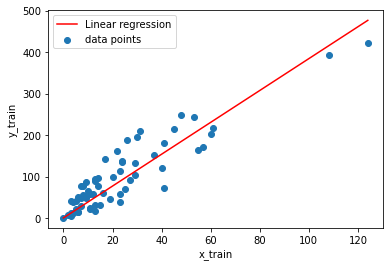

In [7]:
y_pred = theta0_new + theta1_new * x_train
plt.scatter(x_train, y_train, label='data points') 
plt.plot([min(x_train), max(x_train)], [min(y_pred), max(y_pred)], color='red', label='Linear regression')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

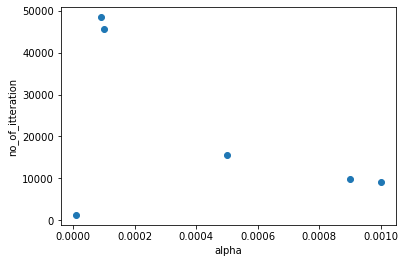

In [8]:
# Relationship between alpha coefficient and number of itteration
alpha = [0.00009, 0.00001, 0.0009, 0.0005, 0.0001, 0.001]
no_of_itteration = [48443, 1264,9905, 15505, 45683, 9123]
plt.scatter(alpha, no_of_itteration)
plt.xlabel('alpha')
plt.ylabel('no_of_itteration')
plt.show()

## choose alpha coefficient depends on number of itteration, as seen below the minimum number of itteration is 1264 when alpha value => 0.00001

#### alpha = 0.00009 --> theta0 = 17.79630615371888 --> theta1 = 3.4612874706614605 --> no_of_itteration = 48443
#### alpha = 0.00001 --> theta0 = 0.20979833217481175 --> theta1 = 3.8410165694587928 --> no_of_itteration = 1264
#### alpha = 0.0009 --> theta0 = 19.774765608043676 --> theta1 = 3.4185678391875 --> no_of_itteration = 9905
#### alpha = 0.0005 --> theta0 = 19.598967705789576 --> theta1 = 3.4223637327964256 --> no_of_itteration = 15505
#### alpha = 0.0001 --> theta0 = 18.01611398732721 --> theta1 = 3.456541298266413 --> no_of_itteration = 45683
#### alpha = 0.001 --> theta0 = 19.79676977617378 --> theta1 = 3.4180927170153703 --> no_of_itteration = 9123

### Store thetas values in text file

In [9]:
file = open("thetas.txt","w+")
file.write(str(theta0_new))
file.write(",")
file.write(str(theta1_new))
file.close()